In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
df = pd.DataFrame({'Y':y,'X':x})
df.insert(0,'B0',1)
df.insert(3,'X2',x*x)
X = df.drop('Y',axis=1)
X = X.values
y = df['Y'].values
Xt = X.T
XtX = np.dot(Xt,X)
XtXInv=np.linalg.inv(XtX)
Xty = np.dot(Xt,y)
BHAT = np.dot(XtXInv,Xty)
print(BHAT)

[-6.11973959  8.48492679 -1.62853134]


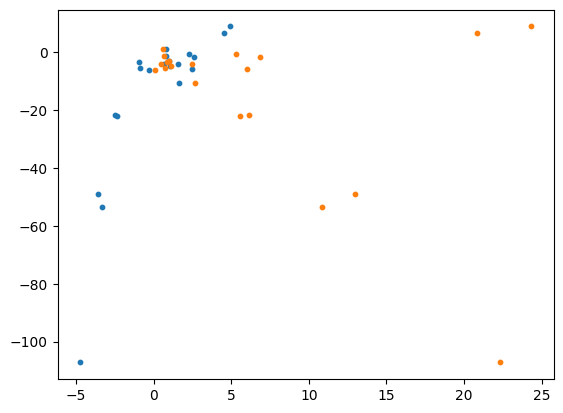

In [3]:
n = len(X)
plt.scatter(df['X'],y,s=10)
plt.scatter(df['X2'],y,s=10)
plt.show()

In [4]:
rmse = 0
for i in range(n):
    y_pred = BHAT[0] + BHAT[1]*df['X'] + BHAT[2]*df['X2']
    rmse += (y[i] - y_pred)**2
rmse = np.sqrt(rmse/n)
print("Root Mean Square Error:\n",rmse)

Root Mean Square Error:
 0     45.758538
1     29.939140
2     26.488588
3     73.097580
4     50.875530
5     28.468559
6     26.465431
7     32.737460
8     32.675766
9     29.852716
10    31.758314
11    33.713229
12    27.076725
13    31.880100
14    29.573961
15    30.473006
16    34.958345
17    32.759231
18    30.631474
19    29.516097
dtype: float64


In [5]:
mean_y = np.mean(y)
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = BHAT[0] + BHAT[1] * df['X'] + BHAT[2] * df['X2']
    ss_tot += (y[i] - mean_y)**2
    ss_res += (y[i] - y_pred)**2
r2 = 1-(ss_res/ss_tot)
print("R2 Score:\n",r2)

R2 Score:
 0    -1.989495
1    -0.279771
2    -0.001777
3    -6.628859
4    -2.695485
5    -0.157136
6    -0.000027
7    -0.530184
8    -0.524422
9    -0.272393
10   -0.440020
11   -0.622760
12   -0.046757
13   -0.451085
14   -0.248742
15   -0.325819
16   -0.744839
17   -0.532220
18   -0.339644
19   -0.243860
dtype: float64


In [6]:
x_new = float(input("Enter the value for X:"))
print(BHAT[0] + BHAT[1] * x_new + BHAT[2] * (x_new**2))

Enter the value for X:50
-3653.201760604349
